Обучение завершено на эпохе 2


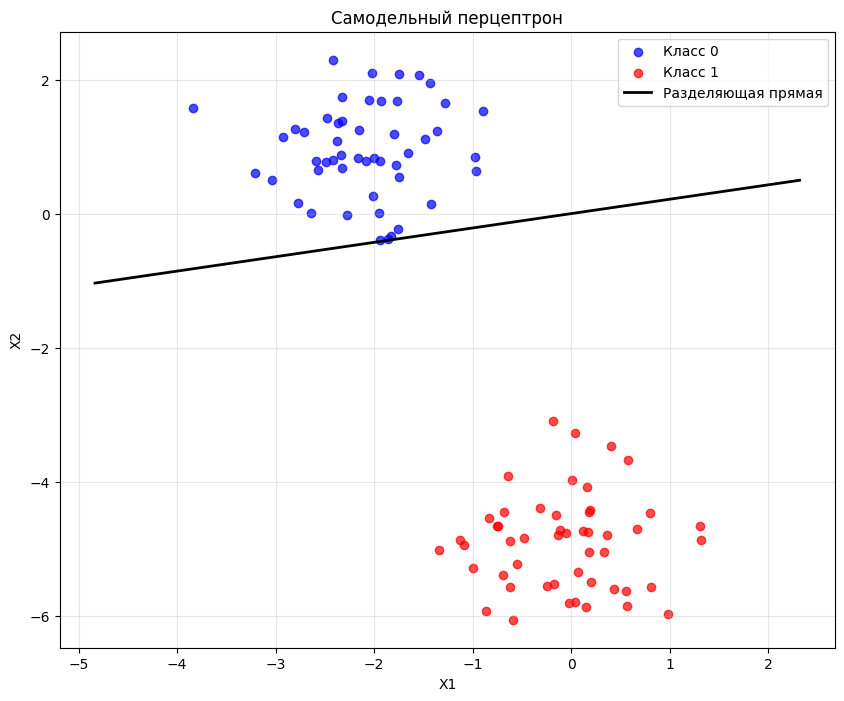

Веса: [ 0.12443124 -0.5802111 ]
Смещение: 0.0


In [15]:
# Перцептрон самодельный

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs


# Задали класс перцептрона, при инициализации задали шаг обучения learning_rate=0,1 и количество итераций обучения max_epochs=100.
class SimplePerceptron:
    def __init__(self, learning_rate=0.1, max_epochs=100):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.weights = None
        self.bias = None
        
    # Задали функцию активации перцептрона, перцептрон имеет только 2 состояния: 1 для положительных и 0 для отрицательных чисел.
    def activation(self, x):
        return 1 if x >= 0 else 0
    
    # Задаем функцию обучения, где устанавливаем начальные значения весов weight и смещения bias
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for epoch in range(self.max_epochs):
            errors = 0
            for i in range(n_samples):
                # Прямое распространение
                # в каждой иттерации для каждой точки умножаем Х координату на вес и прибавляем смещение
                linear_output = np.dot(X[i], self.weights) + self.bias
                prediction = self.activation(linear_output) # получаем предсказание
                
                # Обновление весов
                update = self.learning_rate * (y[i] - prediction)
                self.weights += update * X[i]
                self.bias += update
                
                errors += int(update != 0)
            
            if errors == 0:
                print(f"Обучение завершено на эпохе {epoch + 1}")
                break
                
    # фуккция предсказания после обучения
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation(x) for x in linear_output])

## Создаем два линейно разделимых множества точек ##
coord_1 = [-2, 1] # центр первого множества
coord_2 = [0, -5] # центр второго множества

# создаем два множества методом из библиотеки sklearn, n_samples - суммарное количество элементов
X, y = make_blobs(n_samples=100, centers=[coord_1, coord_2], n_features=2, 
                  random_state=42, cluster_std=0.7)

# Обучаем наш перцептрон
perceptron_custom = SimplePerceptron(learning_rate=0.1, max_epochs=100)
perceptron_custom.fit(X, y)

# Визуализация
plt.figure(figsize=(10, 8))

# Рисуем точки
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Класс 0', alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Класс 1', alpha=0.7)

# Рисуем разделяющую прямую
# Задаем границы координат на основе максимальных и минимальных значений полученных множеств
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx = np.linspace(x_min, x_max, 100)
# Уравнение разделяющей прямой: w0*x + w1*y + b = 0 => y = (-w0*x - b)/w1
if perceptron_custom.weights[1] != 0:
    yy = (-perceptron_custom.weights[0] * xx - perceptron_custom.bias) / perceptron_custom.weights[1]
    plt.plot(xx, yy, 'k-', label='Разделяющая прямая', linewidth=2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Самодельный перцептрон')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Веса: {perceptron_custom.weights}")
print(f"Смещение: {perceptron_custom.bias}")